In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## GOT Network

Edges column names: Index(['Source', 'Target', 'Weight', 'Season'], dtype='object')
Nodes column names: Index(['Id', 'Label'], dtype='object')


/var/folders/87/dhv__9sj0yv1kz0pfv2ds9nh0000gn/T/ipykernel_5985/3302561382.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', len(labels))  # Use a color map with a large number of distinct colors


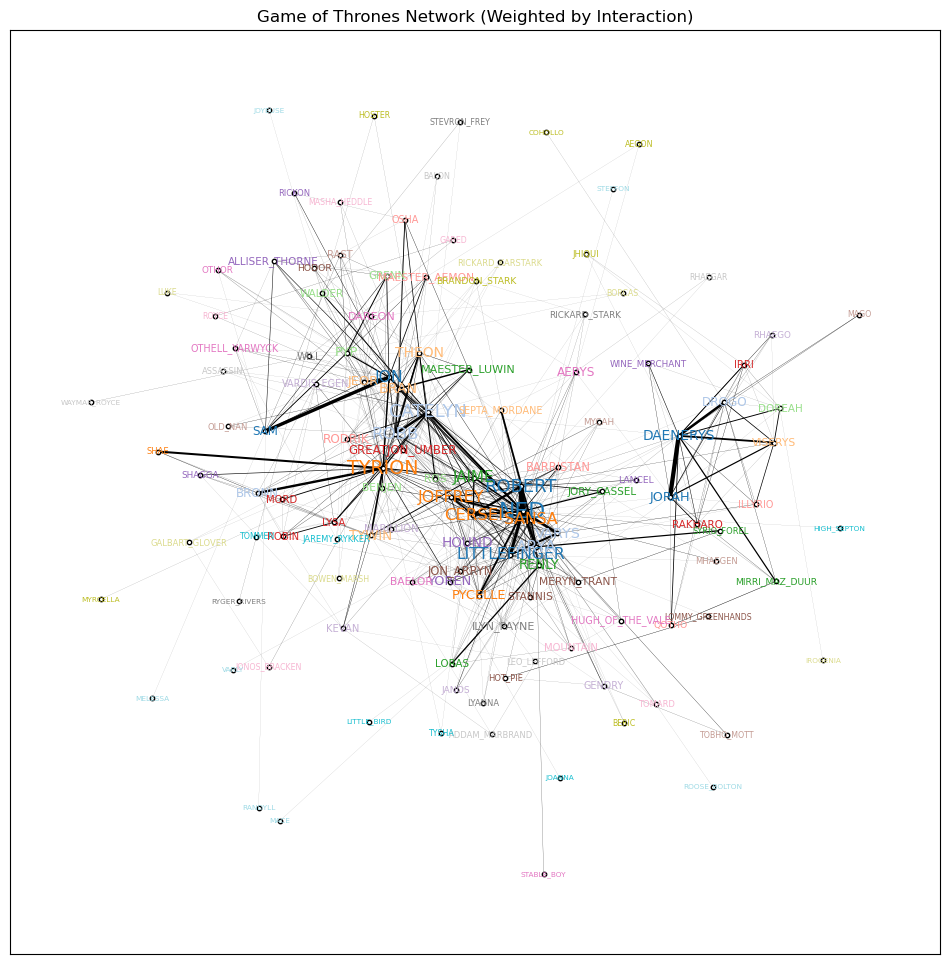

In [58]:
import matplotlib.cm as cm

# Load the edges and nodes CSV files
season = 1
edges_file_path = f'got-data/got-s{season}-edges.csv'
nodes_file_path = f'got-data/got-s{season}-nodes.csv'

edges_data = pd.read_csv(edges_file_path)
nodes_data = pd.read_csv(nodes_file_path)

# Debugging: Print column names to check for issues
print("Edges column names:", edges_data.columns)
print("Nodes column names:", nodes_data.columns)

# Strip leading/trailing spaces from column names if necessary
edges_data.columns = edges_data.columns.str.strip()
nodes_data.columns = nodes_data.columns.str.strip()

# Create a graph object using the edges data
G = nx.from_pandas_edgelist(edges_data, 'Source', 'Target', edge_attr=True)

# Add node attributes (like Season or other properties) from the nodes CSV
for index, row in nodes_data.iterrows():
    G.nodes[row['Id']].update(row.to_dict())

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['Weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)

# Only label nodes with many interactions (degree above a certain threshold)
threshold = 0  # Adjust this threshold based on how many interactions you want
labels = {node: node for node, degree in G.degree() if degree > threshold}

# Generate a color map
color_map = cm.get_cmap('tab20', len(labels))  # Use a color map with a large number of distinct colors

# Iterate over labels and draw them with different colors
font_sizes = [6 + G.degree(node) for node in labels]
for idx, (node, font_size) in enumerate(zip(labels, font_sizes)):
    color = color_map(idx)  # Assign a unique color to each node
    nx.draw_networkx_labels(
        G, pos, {node: labels[node]},
        font_size=np.sqrt(font_size)*2, 
        font_color=color
    )
# Add a title
plt.title("Game of Thrones Network (Weighted by Interaction)")

# Show the plot
plt.show()


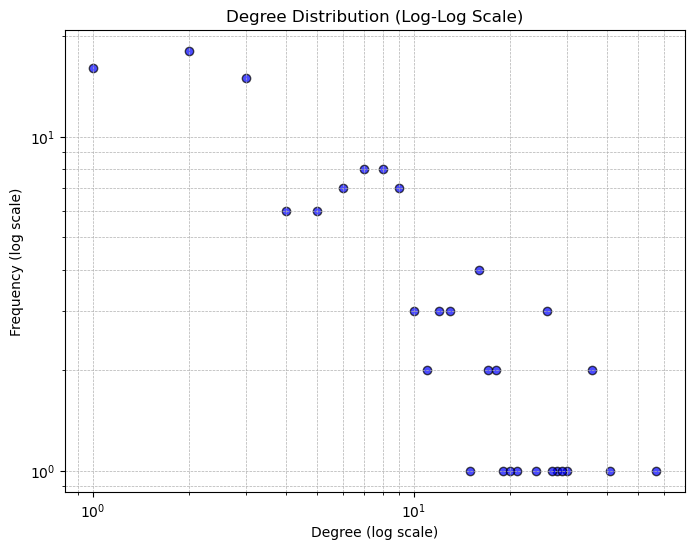

Average degree: 8.714285714285714
Maximum degree: 57


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter
# Calculate degree for each node
degrees = [G.degree(node) for node in G.nodes()]

# Count the frequency of each degree
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Plot the degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(deg, cnt, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# (Optional) Print degree statistics
print(f"Average degree: {np.mean(degrees)}")
print(f"Maximum degree: {np.max(degrees)}")


## Witcher Dataset

/var/folders/87/dhv__9sj0yv1kz0pfv2ds9nh0000gn/T/ipykernel_5985/1275575790.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', len(labels))  # Use a color map with a large number of distinct colors


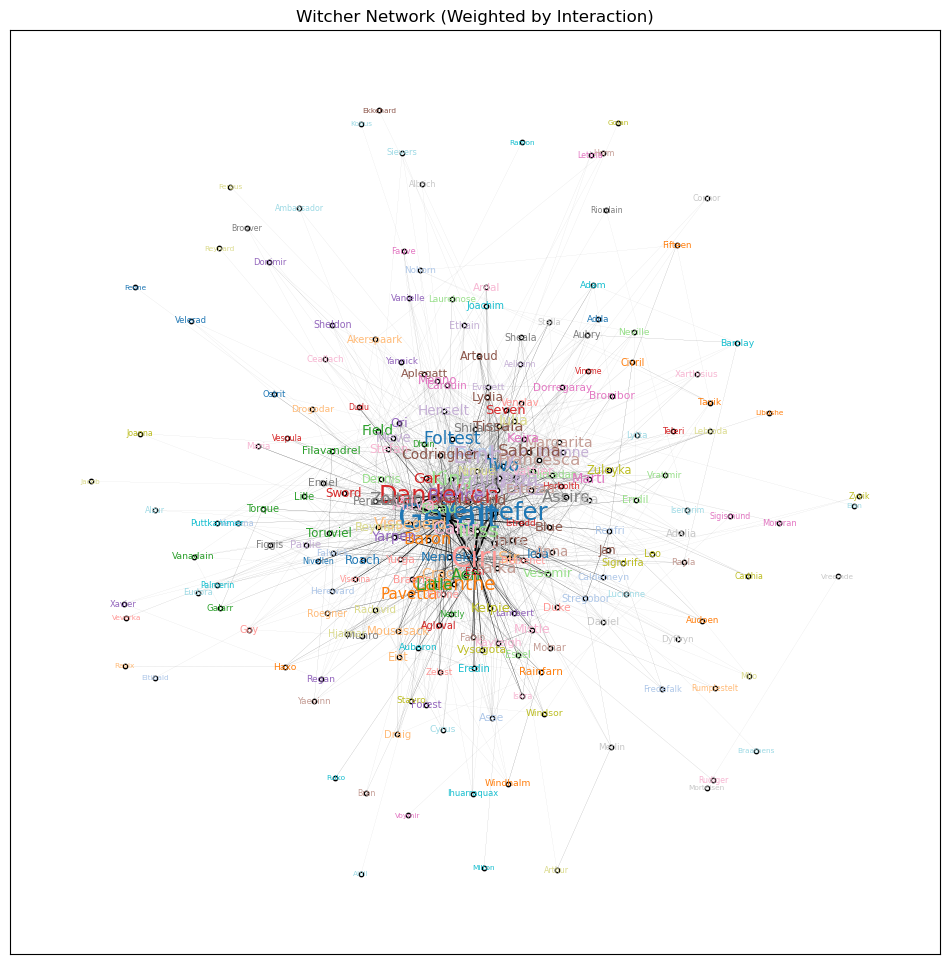

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.cm as cm

# Read the CSV file into a DataFrame
csv_file = 'witcher-data/witcher_network.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Create a graph object using networkx
G = nx.Graph()

# Add edges to the graph with weights, ensuring bidirectionality with the largest weight
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    # Check if the reverse edge already exists and compare weights
    if G.has_edge(target, source):
        # If the reverse edge exists, compare the weights and keep the larger one
        current_weight = G[target][source]['weight']
        if weight > current_weight:
            G[source][target]['weight'] = weight
    else:
        # Add the edge if it doesn't exist
        G.add_edge(source, target, weight=weight)

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=1, iterations=100)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)

# Only label nodes with many interactions (degree above a certain threshold)
threshold = 0  # Adjust this threshold based on how many interactions you want
labels = {node: node for node, degree in G.degree() if degree > threshold}

# Generate a color map
color_map = cm.get_cmap('tab20', len(labels))  # Use a color map with a large number of distinct colors

# Iterate over labels and draw them with different colors
font_sizes = [6 + G.degree(node) for node in labels]
for idx, (node, font_size) in enumerate(zip(labels, font_sizes)):
    color = color_map(idx)  # Assign a unique color to each node
    nx.draw_networkx_labels(
        G, pos, {node: labels[node]},
        font_size=np.sqrt(font_size)*2, 
        font_color=color
    )

# Add a title
plt.title("Witcher Network (Weighted by Interaction)")

# Show the plot
plt.show()


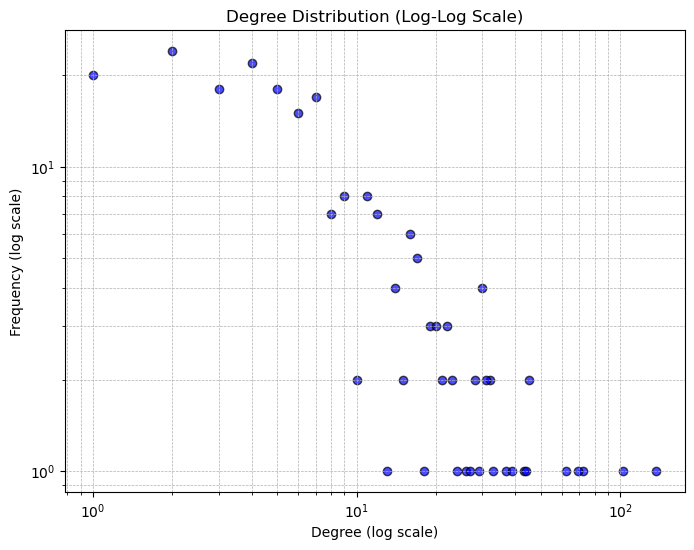

Average degree: 11.3125
Maximum degree: 137


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter
# Calculate degree for each node
degrees = [G.degree(node) for node in G.nodes()]

# Count the frequency of each degree
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Plot the degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(deg, cnt, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# (Optional) Print degree statistics
print(f"Average degree: {np.mean(degrees)}")
print(f"Maximum degree: {np.max(degrees)}")


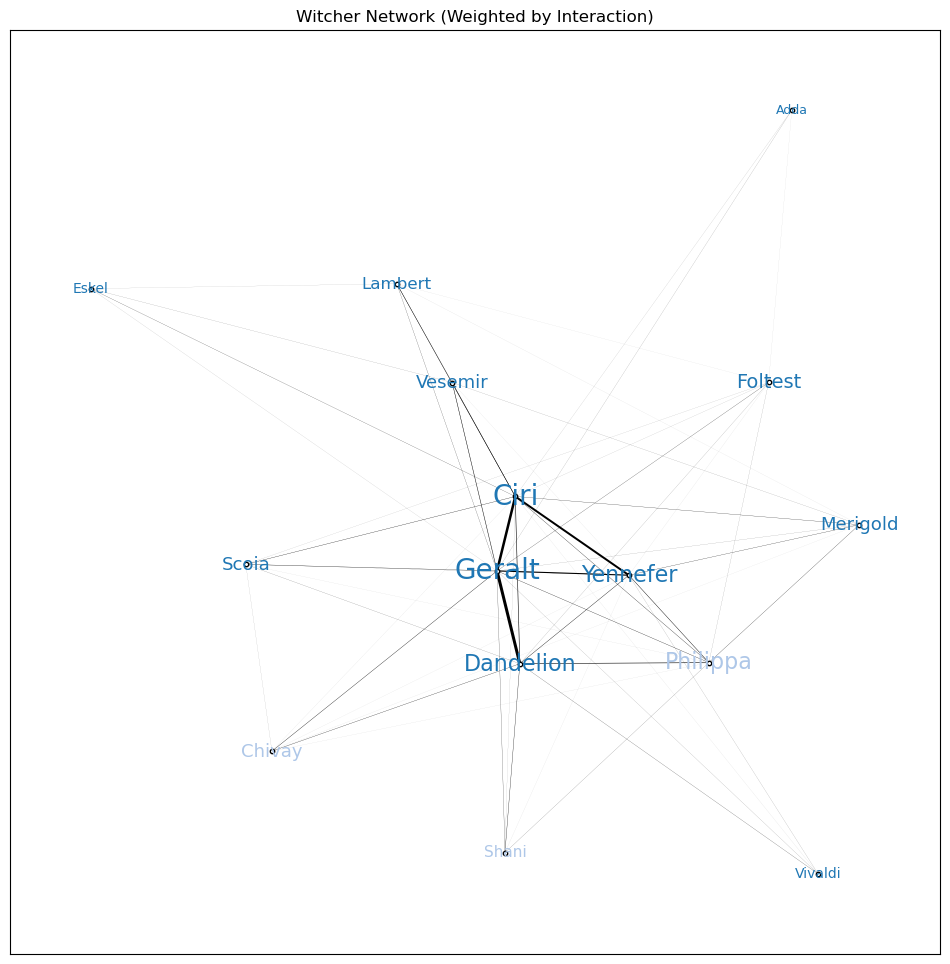

In [54]:
# Read the CSV file into a DataFrame
csv_file = 'witcher-data/witcher_small_network.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Create a graph object using networkx
G = nx.Graph()

# Add edges to the graph with weights, ensuring bidirectionality with the largest weight
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    # Check if the reverse edge already exists and compare weights
    if G.has_edge(target, source):
        # If the reverse edge exists, compare the weights and keep the larger one
        current_weight = G[target][source]['weight']
        if weight > current_weight:
            G[source][target]['weight'] = weight
    else:
        # Add the edge if it doesn't exist
        G.add_edge(source, target, weight=weight)

# Adjust layout to make nodes more sparse

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)
threshold = 0  # Adjust this threshold based on how many interactions you want
labels = {node: node for node, degree in G.degree() if degree > threshold}

# Draw labels for the nodes with a smaller font size
font_sizes = [6 + G.degree(node) for node in labels]
for idx, (node, font_size) in enumerate(zip(labels, font_sizes)):
    color = color_map(idx)  # Assign a unique color to each node
    nx.draw_networkx_labels(
        G, pos, {node: labels[node]},
        font_size=font_size, 
        font_color=color
    )
# Add a title
plt.title("Witcher Network (Weighted by Interaction)")

# Show the plot
plt.show()

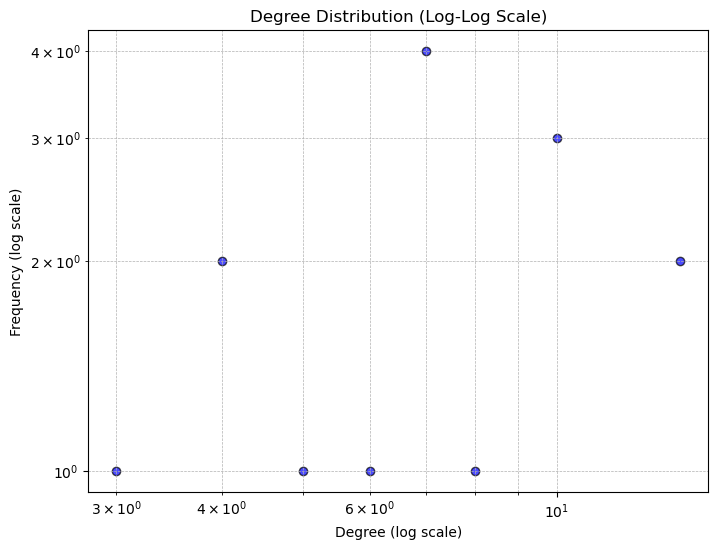

Average degree: 7.733333333333333
Maximum degree: 14


In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter
# Calculate degree for each node
degrees = [G.degree(node) for node in G.nodes()]

# Count the frequency of each degree
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Plot the degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(deg, cnt, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# (Optional) Print degree statistics
print(f"Average degree: {np.mean(degrees)}")
print(f"Maximum degree: {np.max(degrees)}")


## Soccer 1988

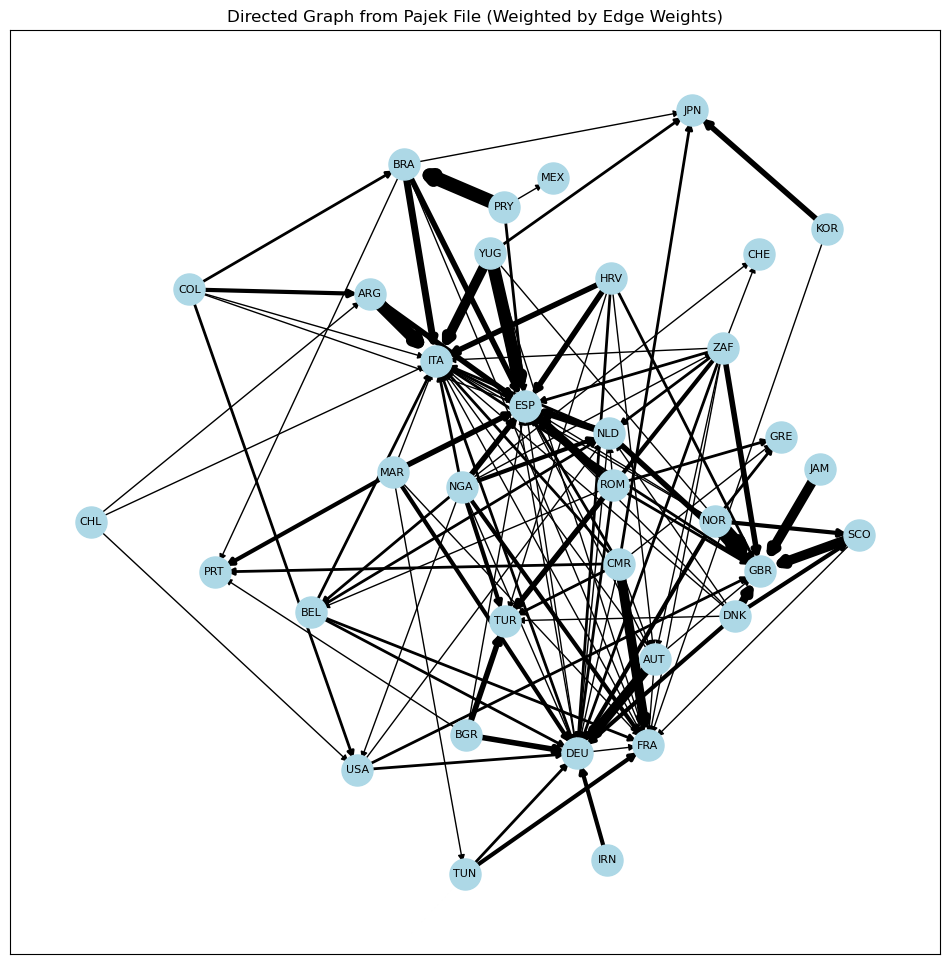

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# File path to your dataset
edges_file = 'soccer-data/soccer1988.txt'  # Replace with your actual file path

# Create an empty directed graph
G = nx.DiGraph()

# Open the file and read lines
with open(edges_file, 'r') as f:
    lines = f.readlines()

# Parse vertices
vertices_section = False
for line in lines:
    line = line.strip()
    if "*Vertices" in line:
        vertices_section = True
        continue
    if "*Arcs" in line:  # End of vertices section
        break
    
    if vertices_section:
        parts = line.split()
        if len(parts) >= 5:
            node_id = int(parts[0])  # Vertex ID
            label = parts[1].strip('"')  # Vertex label
            x, y = float(parts[2]), float(parts[3])  # Coordinates
            # Add node with label and position
            G.add_node(node_id, label=label, pos=(x, y))

# Parse arcs (directed edges)
arcs_section = False
for line in lines:
    line = line.strip()
    if "*Arcs" in line:
        arcs_section = True
        continue
    
    if arcs_section:
        parts = line.split()
        if len(parts) >= 3:
            source, target, weight = int(parts[0]), int(parts[1]), float(parts[2])
            # Add directed edge with weight
            G.add_edge(source, target, weight=weight)

# Get node positions and labels for visualization
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')

# Draw the graph
plt.figure(figsize=(12, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw edges with weights affecting thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Add a title
plt.title("Directed Graph from Pajek File (Weighted by Edge Weights)")

# Show the plot
plt.show()


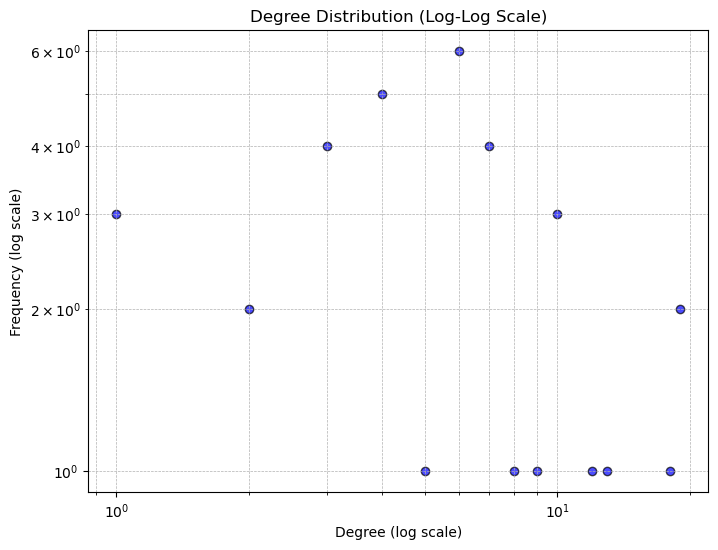

Average degree: 6.742857142857143
Maximum degree: 19


In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter
# Calculate degree for each node
degrees = [G.degree(node) for node in G.nodes()]

# Count the frequency of each degree
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Plot the degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(deg, cnt, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# (Optional) Print degree statistics
print(f"Average degree: {np.mean(degrees)}")
print(f"Maximum degree: {np.max(degrees)}")


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# File path to your dataset
edges_file = 'divorce-data/divorce.txt'  # Replace with your actual file path

# Create an empty directed graph
G = nx.DiGraph()

# Open the file and read lines
with open(edges_file, 'r') as f:
    lines = f.readlines()

# Parse vertices
vertices_section = False
for line in lines:
    line = line.strip()
    if "*Vertices" in line:
        vertices_section = True
        continue
    if "*Arcs" in line or "*Edges" in line:  # End of vertices section
        break
    
    if vertices_section and line:
        parts = line.split()
        if len(parts) >= 4:  # Check for at least 4 parts (ID, label, x, y)
            node_id = int(parts[0])  # Vertex ID
            label = parts[1].strip('"')  # Vertex label
            # x = float(parts[2])  # X coordinate
            # y = float(parts[3])  # Y coordinate
            # Add node with label and position
            G.add_node(node_id, label=label, pos=(x, y))

# Parse edges
edges_section = False
for line in lines:
    line = line.strip()
    if "*Edges" in line or "*Arcs" in line:
        edges_section = True
        continue
    
    if edges_section and line:
        parts = line.rsplit(maxsplit=3)
        if len(parts) >= 3:
            
            source, target, weight = int(parts[0]), int(parts[1]), float(parts[2])
            # Add directed edge with weight
            G.add_edge(source, target, weight=weight)

# Check the edges and weights added to the graph
print("Edges in the graph:")
for u, v in G.edges(data=True):
    print(f"{u} -> {v} with weight {G[u][v]['weight']}")

# Get node positions and labels for visualization
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')

# Draw the graph
plt.figure(figsize=(12, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')

# Draw edges with weights affecting thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Scale weights for better visibility (optional)
weights = [w * 10 for w in weights]  # Scale weights up by 10

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Add a title
plt.title("Directed Graph from Pajek File (Weighted by Edge Weights)")

# Show the plot
plt.show()


"Wiley
"Deadhorse"
"Ralph
"Fairbanks
"Nome"
"St
"Aniak"
"Anchorage
"Tuluksak"
"Akiachak"
"Akiak"
"Kwethluk"
"Bethel"
"Napaskiak"
"Napakiak"
"Merle
"Tuntutuliak"
"Eek"
"Kongiganak"
"Kwigillingok"
"Quinhagak"
"Yakutat"
"Dillingham"
"King
"Gustavus"
"Juneau
"Kodiak"
"St
"Sitka"
"Port
"James
"Wrangell"
"Ketchikan
"Sand
"Cold
"Unalaska"
"Eareckson
"Adak
"Bellingham
"Glacier
"Minot
"William
"Grand
"Grand
"Spokane
"Great
"Seattle-Tacoma
"Pangborn
"Grant
"Missoula
"Hector
"Duluth
"Bismarck
"Pullman/Moscow
"Helena
"Yakima
"Marquette
"Lewiston-Nez
"Tri-Cities"
"Walla
"Bert
"Billings
"Gallatin
"Eastern
"Portland
"Mcnary
"Minneapolis-St
"Bangor
"Central
"Cherry
"Austin
"Burlington
"Outagamie
"Roberts
"Mahlon
"Rapid
"Wittman
"Rochester
"La
"Portland
"Jackson
"Joe
"Boise
"Mbs
"Fanning
"Friedman
"North
"Muskegon
"Oneida
"Dane
"Greater
"Syracuse
"Bishop
"General
"Greater
"Manchester"
"Pocatello
"Natrona
"Kent
"Capital
"Albany
"Waterloo
"Tompkins
"Twin
"Detroit
"Sioux
"Dubuque
"Rogue
"General
"Worceste

ValueError: too many values to unpack (expected 2)